# Stock Market Analysis Project

In this project, we will compare the share prices of three auto companies: Tesla, General Motors (GM) and Ford. We would like to find out how the three compare each other in terms of volatility of their prices, their daily and cumulative evolutions. In order to understand the differences and similarities, we will create various visualizations that will help us to udnerstand where do we invest. 

The stock data we have dates from Jan 1 2012 to Jan 1 2017. 

### Part 0: Importing Libraries 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime as dt 
from matplotlib import style 
import pandas_datareader.data as web

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided. Feel free to just use this with read_csv! 

In [56]:
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'google', start, end)

# This method was quite frequently used until recently. However, weWe get the error below because google was deprecated from datareader. 
#We will therefore use the other method. 

NotImplementedError: data_source='google' is not implemented

In [ ]:
Tesla = pd.read_csv('C:/Users/aroyl/Desktop/Datasets/Tesla_Stock.csv')

#Note that connecting to the masterfile did not work but copy pasting the csv file to a folder on the desktop did. 
#Also note that the dataframe needs to have date as its index

tesla= Tesla.set_index('Date')

In [ ]:
tesla.head()

### Other Car Companies

Let us repeat the same steps to import the data on GM and Ford

In [ ]:
Ford = pd.read_csv('C:/Users/aroyl/Desktop/Datasets/Ford_Stock.csv')
ford = Ford.set_index('Date')
ford.head()

In [ ]:
Gm = pd.read_csv('C:/Users/aroyl/Desktop/Datasets/GM_Stock.csv')
gm = Gm.set_index('Date')
gm.head()

## Part 2: Visualizing the Data



We will focus on the Open Price for each of the three car manufacturers. By plotting all three of them in the same graph, we get a first idea of which one of the three has the highest Open Price over the given period of time and how they fluctuate. 

In [ ]:
tesla['Open'].plot(label='Tesla',figsize=(16,6),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

The next step is to plot the Volume of stock traded each day.

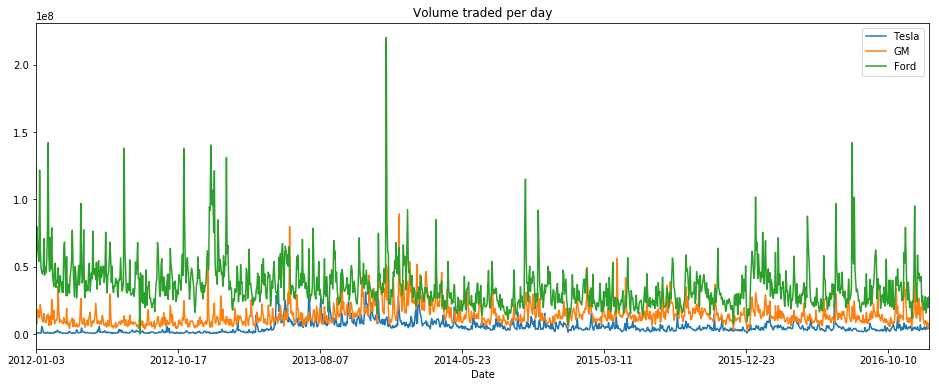

In [57]:
tesla['Volume'].plot(label='Tesla',figsize=(16,6),title='Volume traded per day')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

Interestingly, the plot shows something happenned in 2013. What happened here? Which date was it and what happenned on that day? 


In [58]:
ford['Volume'].idxmax()

#We see there was a massive spike for Ford. Here is a link to Ford's news of the day from the BBC, 
#which offers free and reliable information due to its overall fair covering of business news. 

#https://www.bbc.com/news/business-25430987


'2013-12-18'

____

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)

Let's first create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [59]:

tesla['Total_Traded']=tesla['Open']*tesla['Volume']
gm['Total_Traded']=gm['Open']*gm['Volume']
ford['Total_Traded']=ford['Open']*ford['Volume']

Now, let us plot this "Total Traded" against the time index.

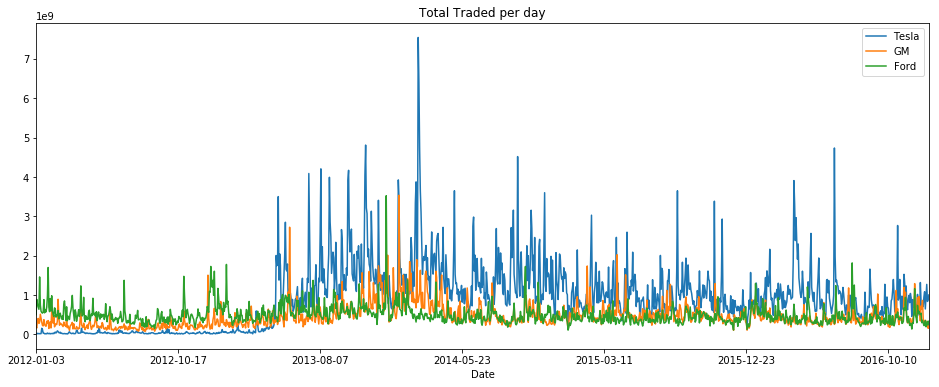

In [60]:
tesla['Total_Traded'].plot(label='Tesla',figsize=(16,6),title='Total Traded per day')
gm['Total_Traded'].plot(label='GM')
ford['Total_Traded'].plot(label='Ford')
plt.legend()

As we notice, in 2014, Tesla saw a massive spike. Let us first find out the date when it happenned and explore what exactly happenned. 

In [61]:
tesla['Total_Traded'].idxmax()

#https://money.cnn.com/2014/02/25/investing/tesla-record-high/
# Tesla hit a record high after it was expecting to launch new factory and Morgan Stanley as a result upgraded the car company's shares.

'2014-02-25'

____

Let's plot out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. This will help us to understand the evolution of the prices 

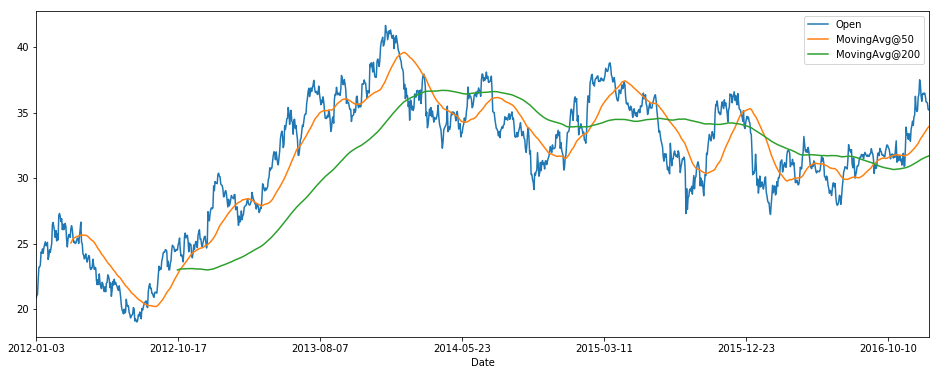

In [62]:
# Code here

gm['MovingAvg@50'] = gm['Open'].rolling(50).mean()
gm['MovingAvg@200'] = gm['Open'].rolling(200).mean()
gm[['Open','MovingAvg@50','MovingAvg@200']].plot(label='GM', figsize=(16,6))

We notice the trend over a period of time. It goes up but reaches a plateau sometime in 2014 and then begins a slow downward pattern

______

Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can infd out using a scatter matrix plot. We may need to rearrange the columns into a new single dataframe. Additonal info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot 

In [63]:
from pandas.plotting import scatter_matrix

In [64]:
# We want to visualize the relationship between the Open prices of each of the car-manufacturers 
# To do that, we need to create a new dataframe that contains the Open columns extracted from the existing dataframes 

dfcomparison = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
dfcomparison.columns = ['Tesla Open','GM Open','Ford Open']
dfcomparison.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


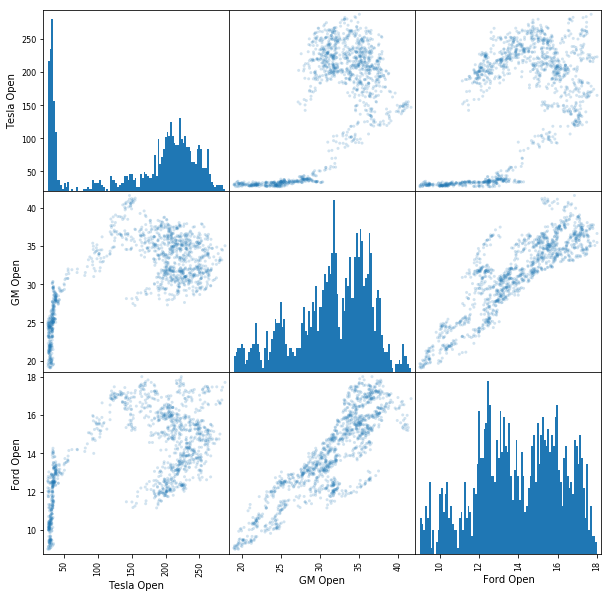

In [65]:
scatter_matrix(dfcomparison,figsize=(10,10),alpha=0.2, hist_kwds={'bins':100});

#scatter_matrix(dfcomparison,figsize=(10,10),alpha=0.5,hist_kwds={'bins':50});

# The plots below reveal that a lot of the data between the three car manufacturers does not show a simple correlation. 
# What we do notice is that when prices are low for Tesla, they keep rising for GM and Ford. 
# But, when Open prices rise for Tesla, they do not rise for the GM and Ford.
# However, GM and Ford prices do show a direct correlation.
# Tesla's Open prices are very high while GM and Ford prices are very low, but when GM and FOrd see a rise, which they 
# do more often than what one would like to believe, Tesla prices do rise but can't beat the two other manufacturers

____
# Part 3: Financial Analysis

In this part, we shall focus on some key financial calculations. We have included the mathematical equations and also the codes. We shall also be plotting the results in order to get a good grasp on the analytics. 

____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. This is an important step in order to understand the patterns of volatility in prices.

We begin by creating a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or we can also use pandas' built in pct_change method. We will use both, just for reference. 

In [66]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [67]:
#method 2 using pct_change()
tesla['returns'] = tesla['Close'].pct_change(1)

In [68]:
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [69]:
gm['returns'] = gm['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1) 

The next step is to plot the histograms stacked. This will help us to compare all three of them simultaneously. The wider the x-axis, the more volatile the stock. We added the alpha in order to get some translucent plots for easier readability.

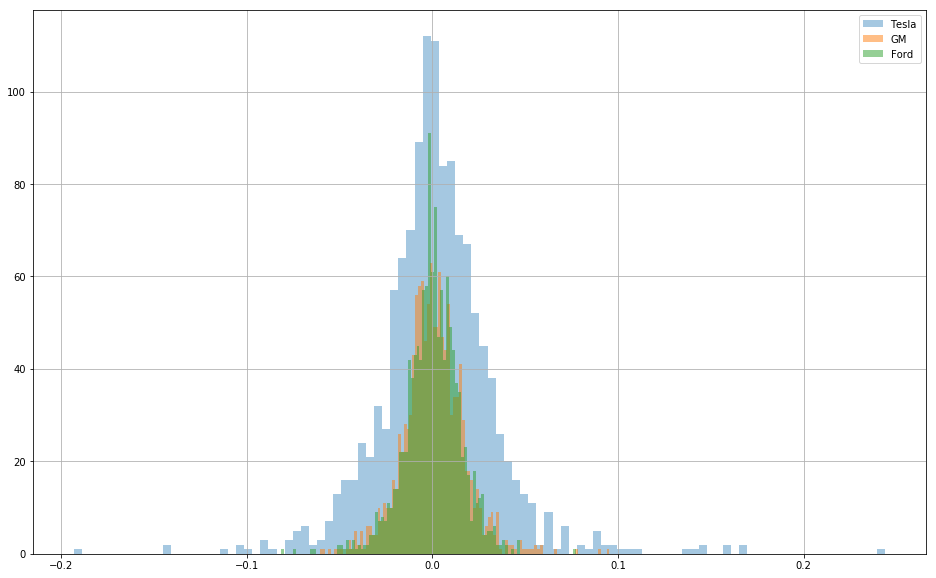

In [70]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(16,10),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

Plotting a KDE instead of histograms for another view point, and it does appear that Tesla has the most volatile of the three as it has the widest plot.

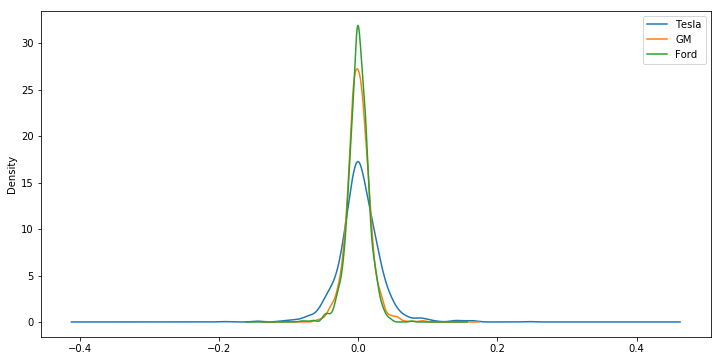

In [71]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

Creating box plots however is the easiest way to understand stocks if we are trying to find both the width and the outliers. 

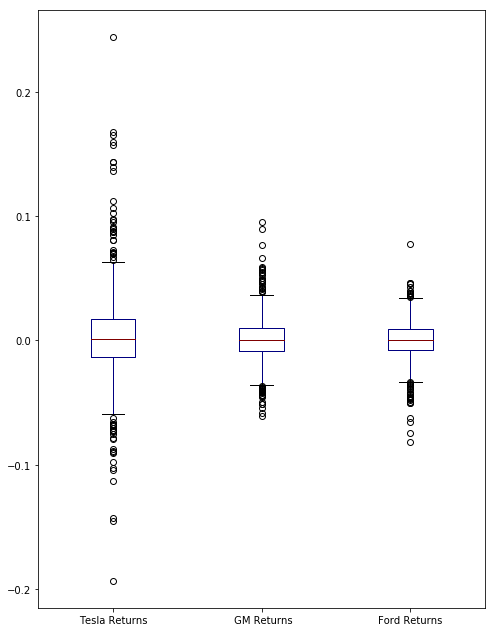

In [72]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

To do this, we will create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market? As per the plots below, it is treated different from the older car brands. 

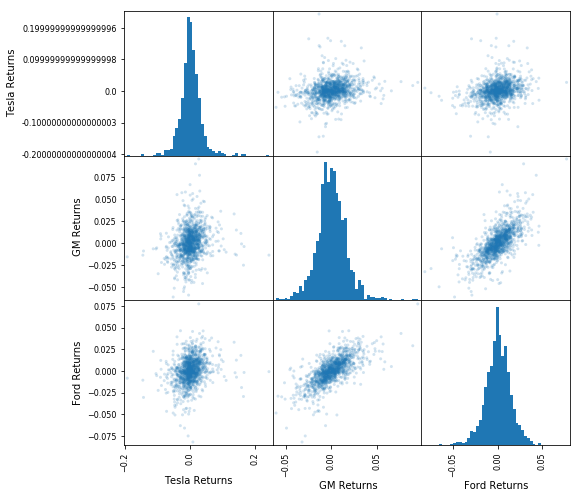

In [73]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely.

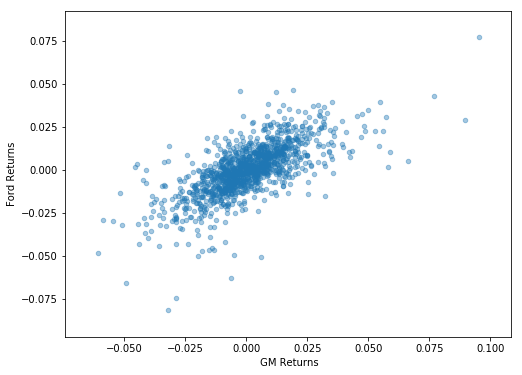

In [74]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(8,6))

____
## Cumulative Daily Returns

Now we can see which stock was the most wide ranging in daily returns.

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. This simple calculation here won't take into account stocks that give back a dividend.

**Cumulative Return**: Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. 

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

So we start by creating a cumulative daily return column for each car company's dataframe.

In [75]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [76]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

Let's plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest? As we see below, Tesla had the highest and Ford had the lowest.

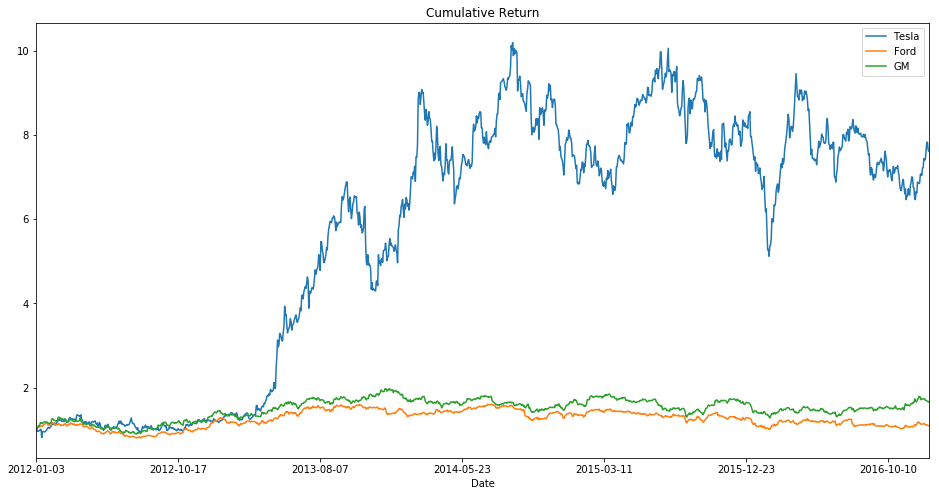

In [77]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

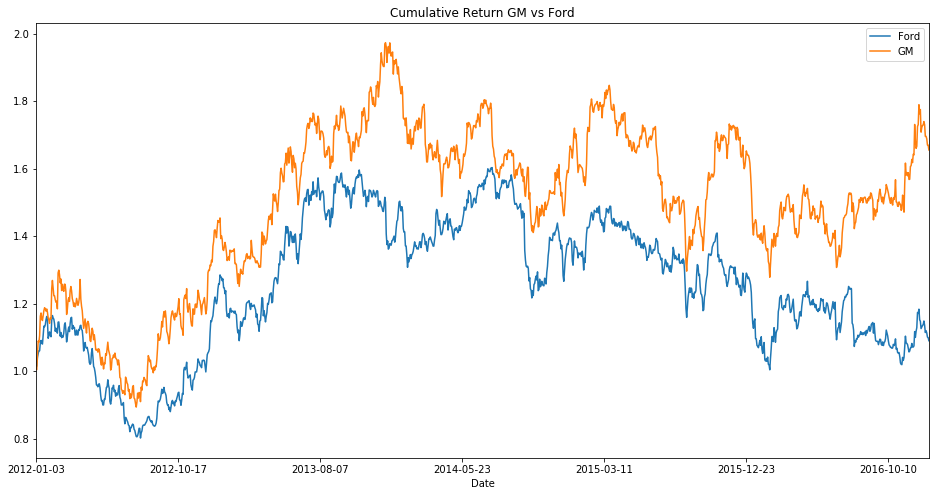

In [78]:
# To understand the differences between Ford and GM, we will repeat the previous plot but remove the Tesla code. 

#tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford',figsize=(16,8),title='Cumulative Return GM vs Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

We do notice that GM stocks have higher returns than Ford, almost consistently.

This basic stock analysis was taken from Udemy and Pieras Data. The copyright does not belong to me. This is to give you an understanding on how I practiced Financial Analytics on stock prices. 